<a href="https://colab.research.google.com/github/mvfolino68/google_vision/blob/master/GoogleVisionAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google.cloud.vision
import os
import io
import requests
import argparse
from enum import Enum

from google.cloud import vision
from google.cloud.vision import types
from PIL import Image, ImageDraw
from IPython.display import display # to display images
import smtplib 
from email.mime.multipart import MIMEMultipart 
from email.mime.text import MIMEText 
from email.mime.base import MIMEBase 
from email import encoders 

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/sturdy-spanner-221114-891167b05110.json"
!echo $GOOGLE_APPLICATION_CREDENTIALS

  Using cached https://files.pythonhosted.org/packages/ec/e3/77b17733592fde11b7250444ddedd8d04ae1be6f0f4c0d9f47ed154a686e/google_cloud_vision-0.39.0-py2.py3-none-any.whl
/content/sturdy-spanner-221114-891167b05110.json


In [0]:
class ImageToProcess:
  def __init__(self, image_url, to_addr):
    self.image_url = image_url
    self.to_addr = to_addr
  class FeatureType(Enum):
    PAGE = 1
    BLOCK = 2
    PARA = 3
    WORD = 4
    SYMBOL = 5

  def render_doc_text(self, fileout):
    self.fileout = fileout


    def draw_boxes(image, bounds, color):
        """Draw a border around the image using the hints in the vector list."""
        # self.image = image
        # self.bounds = bounds
        # self.color = color

        draw = ImageDraw.Draw(image)
        for bound in bounds:
            draw.polygon([
                bound.vertices[0].x, bound.vertices[0].y,
                bound.vertices[1].x, bound.vertices[1].y,
                bound.vertices[2].x, bound.vertices[2].y,
                bound.vertices[3].x, bound.vertices[3].y], None, color)
        return image


    def get_document_bounds(image, feature):
        # [START vision_document_text_tutorial_detect_bounds]
        """Returns document bounds given an image."""
        # self.image = image
        # self.feature = feature

        client = vision.ImageAnnotatorClient()

        bounds = []
        urlimg = requests.get(image, stream=True)
        content = urlimg.content

        image = types.Image(content=content)
        response = client.document_text_detection(image=image)
        document = response.full_text_annotation

        # Collect specified feature bounds by enumerating all document features
        for page in document.pages:
            for block in page.blocks:
                for paragraph in block.paragraphs:
                    for word in paragraph.words:
                        for symbol in word.symbols:
                            if (feature == FeatureType.SYMBOL):
                                bounds.append(symbol.bounding_box)

                        if (feature == FeatureType.WORD):
                            bounds.append(word.bounding_box)

                    if (feature == FeatureType.PARA):
                        bounds.append(paragraph.bounding_box)

                if (feature == FeatureType.BLOCK):
                    bounds.append(block.bounding_box)

            if (feature == FeatureType.PAGE):
                bounds.append(block.bounding_box)

        # The list `bounds` contains the coordinates of the bounding boxes.
        # [END vision_document_text_tutorial_detect_bounds]
        return bounds

    def detect_text( image):
        """Detects text in the file."""
        # self.image = image
        client = vision.ImageAnnotatorClient()

        urlimg = requests.get(image, stream=True)
        content = urlimg.content
        image = vision.types.Image(content=content)
        response = client.text_detection(image=image)
        texts = response.text_annotations
        print('Texts:')
        # for text in texts:
        #     print('\n"{}"'.format(text.description))
        return texts
    
    def finish_up(mail, text, jpegfile):
      # self.mail = mail
      # self.text = text

      fromaddr = "mtbankedo@gmail.com"
      toaddr = mail
        
      # instance of MIMEMultipart 
      msg = MIMEMultipart() 
        
      # storing the senders email address   
      msg['From'] = fromaddr 
        
      # storing the receivers email address  
      msg['To'] = toaddr 
        
      # storing the subject  
      msg['Subject'] = "Google Vision Demonstration"
        
      # string to store the body of the mail 
      body = text
        
      # attach the body with the msg instance 
      msg.attach(MIMEText(body, 'plain')) 
        
      # open the file to be sent  
      filename = "Google_Vision.jpeg"
      attachment = open(jpegfile, "rb") 
        
      # instance of MIMEBase and named as p 
      p = MIMEBase('application', 'octet-stream') 
        
      # To change the payload into encoded form 
      p.set_payload((attachment).read()) 
        
      # encode into base64 
      encoders.encode_base64(p) 
        
      p.add_header('Content-Disposition', "attachment; filename= %s" % filename) 
        
      # attach the instance 'p' to instance 'msg' 
      msg.attach(p) 
        
      # creates SMTP session 
      s = smtplib.SMTP('smtp.gmail.com', 587) 
        
      # start TLS for security 
      s.starttls() 
        
      # Authentication 
      s.login(fromaddr, "gpnfwiubcbvtemfc") 
        
      # Converts the Multipart msg into a string 
      text = msg.as_string() 
        
      # sending the mail 
      s.sendmail(fromaddr, toaddr, text) 
        
      # terminating the session 
      s.quit()      




    image = Image.open(requests.get(self.image_url, stream=True).raw)
    bounds = get_document_bounds(image = self.image_url, feature = FeatureType.PAGE)
    draw_boxes(image, bounds, 'blue')
    bounds = get_document_bounds(image = self.image_url, feature = FeatureType.PARA)
    draw_boxes(image, bounds, 'red')
    bounds = get_document_bounds(image = self.image_url, feature = FeatureType.WORD)
    draw_boxes(image, bounds, 'yellow')

    if fileout != 0:
        image.save(fileout)
        display(image)
    else:
        display(image)

      
    texts = detect_text(self.image_url)
    total_text = ''
    for text in texts:
      print('\n"{}"'.format(text.description))
      total_text += '\n"{}"'.format(text.description)
  
    finish_up(self.to_addr, total_text, fileout)



In [0]:
IMAGE = 'https://upload.wikimedia.org/wikipedia/commons/f/fa/Passport_card.jpg'
EMAIL = 'mfolino@mtb.com'
image_url_obj = ImageToProcess(IMAGE, EMAIL)

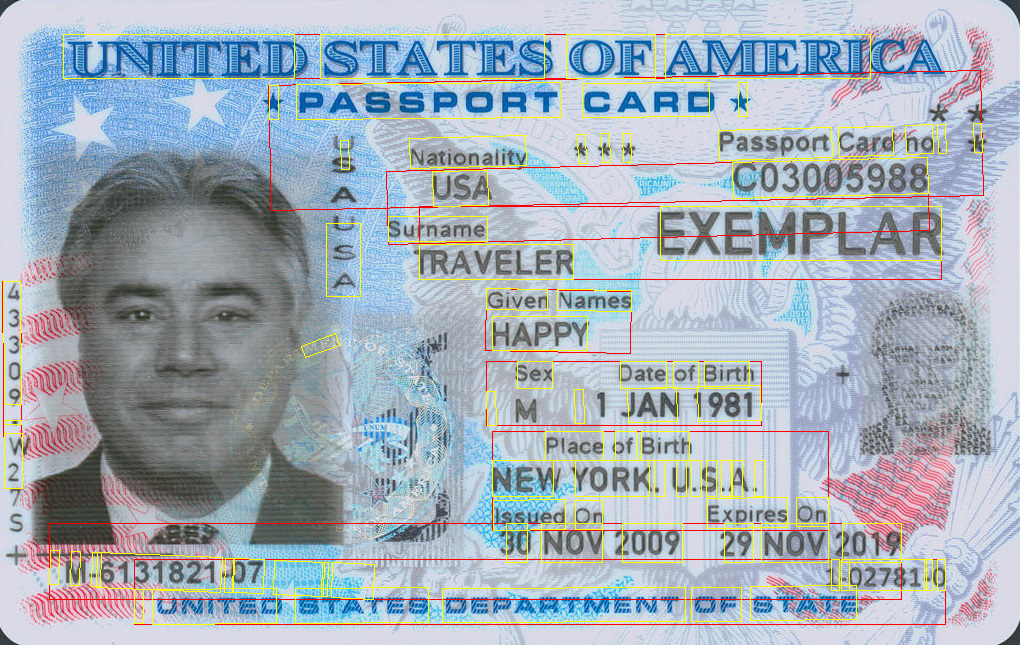

Texts:

"UNITED STATES OF AMERICA
PASSPORT CARD
Passport Card'no.
C03005988
Nationality
S
USA
CAUNT
EXEMPLAR
Surname
TRAVELER
Given Names
HAPPY
MENT
eHAS%ASH,
Sex
Date of Birth
1 JAN 1981
M
willns
Place of Birth
2
NEW YORK. U.S.A.
Expires On
29 NOV 2019
Issued On
30 NOV 2009
S
BES
M-6131821-07
1-02781-0
UMITED STATES CEPARTM NT OF STATE
.כD <עב <
"

"UNITED"

"STATES"

"OF"

"AMERICA"

"PASSPORT"

"CARD"

"Passport"

"Card'no."

"C03005988"

"Nationality"

"S"

"USA"

"CAUNT"

"EXEMPLAR"

"Surname"

"TRAVELER"

"Given"

"Names"

"HAPPY"

"MENT"

"eHAS%ASH,"

"Sex"

"Date"

"of"

"Birth"

"1"

"JAN"

"1981"

"M"

"willns"

"Place"

"of"

"Birth"

"2"

"NEW"

"YORK."

"U.S.A."

"Expires"

"On"

"29"

"NOV"

"2019"

"Issued"

"On"

"30"

"NOV"

"2009"

"S"

"BES"

"M-6131821-07"

"1-02781-0"

"UMITED"

"STATES"

"CEPARTM"

"NT"

"OF"

"STATE"

".כD"

"<עב"

"<"


In [29]:
image_url_obj.render_doc_text('output.jpeg')